<a href="https://colab.research.google.com/github/ckraju/mits/blob/master/mnist_convolutional_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
keras.__version__


'2.5.0'

11501568/11490434 [==============================] - 0s 0us/step


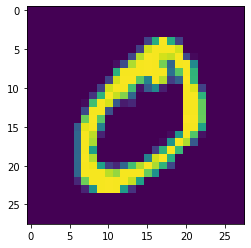

In [3]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#plot the first image in the dataset
plt.imshow(X_train[1])

X_train = X_train.reshape((60000, 28, 28, 1))
X_train = X_train.astype('float32') / 255

X_test = X_test.reshape((10000, 28, 28, 1))
X_test = X_test.astype('float32') / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

![Design layout of our experiment](https://drive.google.com/uc?id=1_HKSTo1I2S7I3c_A8K7TMCZFP38DpJP0)

![Design](https://drive.google.com/uc?id=18n4Pqqjt6bWNjUJU9utqaX52W2cfpcXk)

In [4]:
#check image shape
print ("Dimensions of X_train: ", X_train.shape)

print ("Dimension of the second element in X_train: ", X_train[1].shape)

Dimensions of X_train:  (60000, 28, 28, 1)
Dimension of the second element in X_train:  (28, 28, 1)


In [5]:
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

#create model
model = Sequential()

#add model layers
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))

In [6]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#model.compile(optimzer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
import numpy as np
trainingset = np.vstack ((X_train, X_test))
traininglabels = np.vstack ((y_train, y_test))

In [8]:
#train the model
history = model.fit(trainingset, traininglabels, validation_split=0.2, epochs=3, batch_size=32)

Epoch 1/3
1750/1750 [==============================] - 50s 4ms/step - loss: 0.0813 - accuracy: 0.8602 - val_loss: 0.0118 - val_accuracy: 0.9835
Epoch 2/3
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0096 - accuracy: 0.9873 - val_loss: 0.0066 - val_accuracy: 0.9910
Epoch 3/3
1750/1750 [==============================] - 6s 3ms/step - loss: 0.0068 - accuracy: 0.9906 - val_loss: 0.0067 - val_accuracy: 0.9912


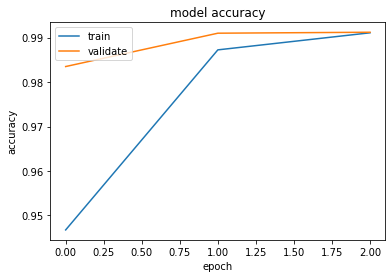

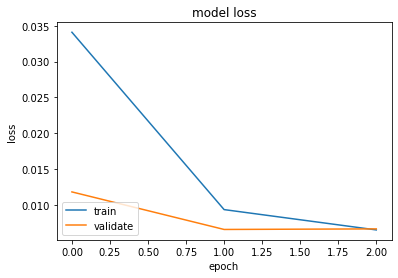

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='lower left')
plt.show()

In [12]:
test_loss, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0061 - accuracy: 0.9914


In [13]:
test_acc

0.9914000034332275

In [14]:
import matplotlib.pyplot as plt
print (history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [15]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[2.9248203e-18, 2.7757495e-13, 5.5948369e-14, 5.0978921e-13,
        2.0904297e-15, 9.2411079e-18, 1.1433412e-19, 1.0000000e+00,
        6.3657987e-17, 4.6386634e-14],
       [5.1347403e-13, 4.2861756e-11, 1.0000000e+00, 6.7329504e-14,
        3.3639236e-15, 1.1125530e-18, 9.6647412e-11, 3.5892344e-15,
        2.0298756e-13, 4.4989162e-17],
       [4.5467580e-10, 1.0000000e+00, 1.1861228e-09, 9.0920891e-12,
        8.0324003e-10, 1.2615757e-10, 5.2096039e-10, 1.9175235e-09,
        2.8133886e-11, 1.8230861e-11],
       [9.9999261e-01, 3.1813438e-10, 2.2114106e-08, 6.3102384e-10,
        7.0534267e-09, 2.7166480e-09, 6.0522170e-06, 3.4319027e-07,
        7.4113538e-09, 9.0430137e-07]], dtype=float32)

In [16]:
#actual results for first 4 images in test set
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

[Source for the experiment](https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5)
[Optimizer](https://emiliendupont.github.io/2018/01/24/optimization-visualization/)
